In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from sci378 import *

Version 0.0.3


In [3]:
data=pd.read_csv('data/temperature.txt',delim_whitespace=True)
data

,Year,Annual_Mean,5-year_Mean
0,1882,-0.08,-0.16
1,1883,-0.19,-0.19
2,1884,-0.26,-0.22
3,1885,-0.30,-0.27
4,1886,-0.29,-0.27
...,...,...,...
129,2011,0.60,0.65
130,2012,0.63,0.67
131,2013,0.65,0.70
132,2014,0.74,*


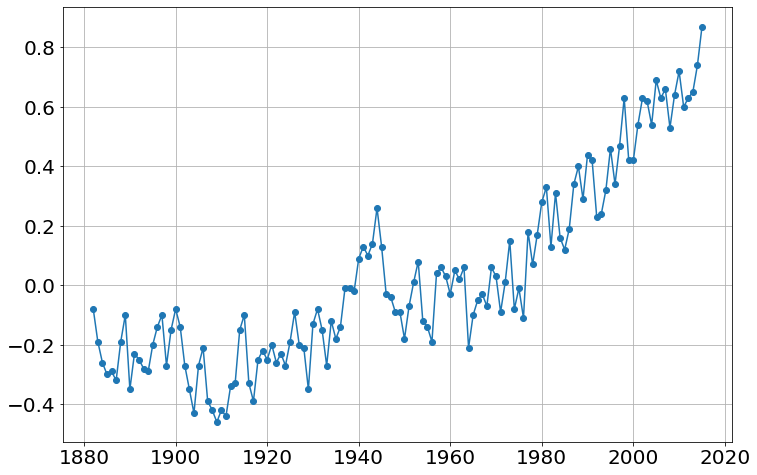

In [4]:
t=array(data['Year'])
T=array(data['Annual_Mean'])
plot(t,T,'-o')

In [6]:
from sie.mcmc import MCMCModel,Uniform,Normal,Jeffreys

## Fit to Linear, as an Example

In [7]:
def P_data(data,m,b,σ):
    x,y=data
    μ=m*x+b     # y ~ μ + random
    distribution=Normal(μ,σ)
    return sum(distribution(y))

In [10]:
data=t,T
model=MCMCModel(data,P_data,
                m=Normal(0,10),
                b=Uniform(-100,100),
                σ=Jeffreys(),
               )

Sampling Prior...
Done.
0.66 s
Running MCMC...
Done.
2.43 s
Running MCMC...
Done.
2.41 s
figsize [10.0, 18.75]


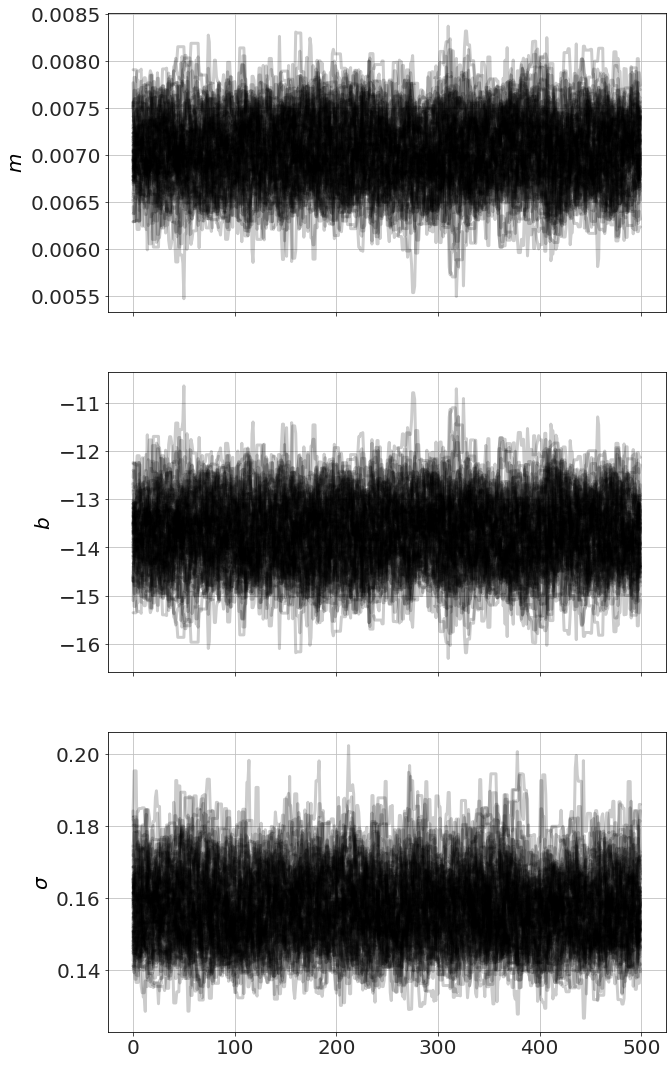

In [11]:
for i in range(2):
    model.run_mcmc(500)
model.plot_chains()

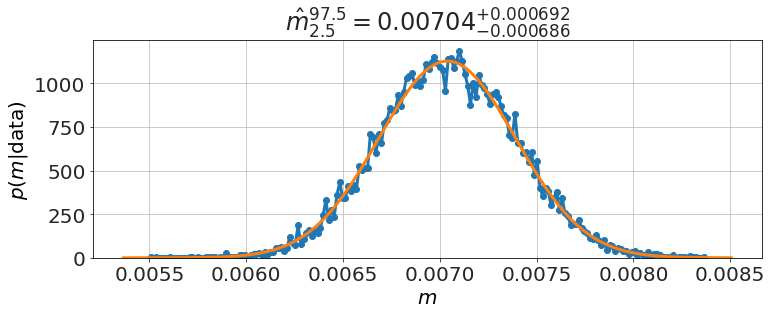

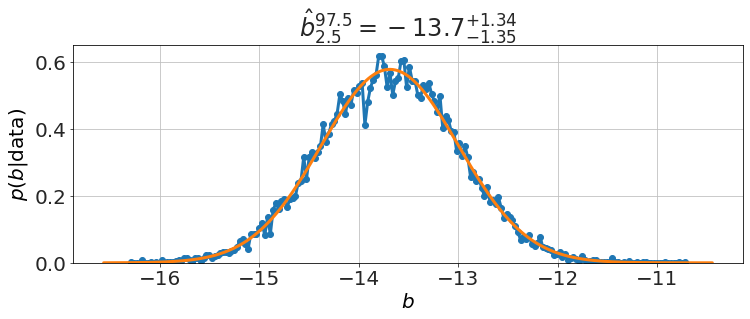

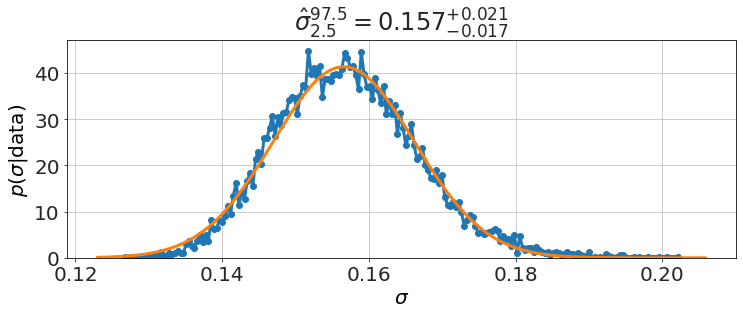

In [12]:
model.plot_distributions()

In [20]:
model.best_estimates()

{'m': array([0.00668837, 0.00703873, 0.00739248]),
 'b': array([-14.37959839, -13.68802714, -13.00573552]),
 'σ': array([0.14730169, 0.15657229, 0.16635913])}

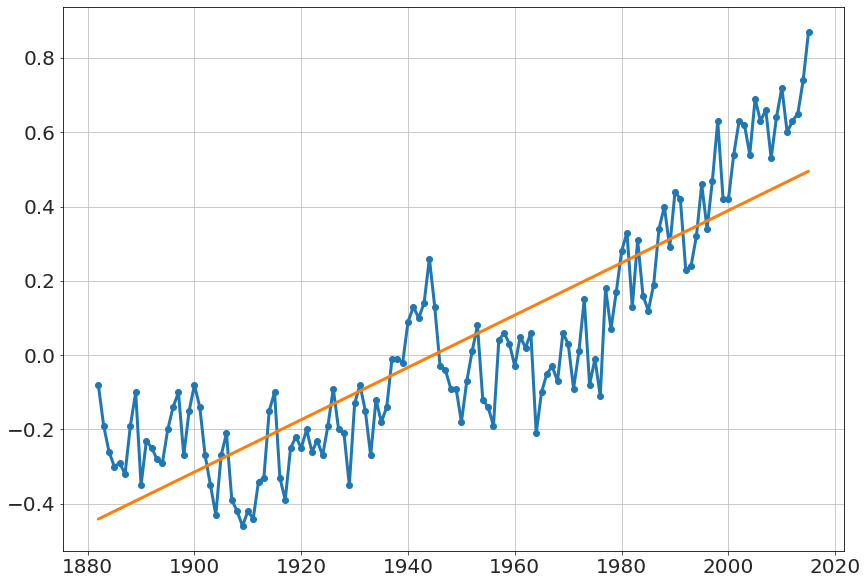

In [24]:
figure(figsize=(14,10))
plot(t,T,'-o')

m=model.best_estimates()['m'][1]
b=model.best_estimates()['b'][1]

μ=m*t+b
plot(t,μ,'-')

In [23]:
m

array([0.00668837, 0.00703873, 0.00739248])

## Fit to Non-Linear

In [28]:
def P_data(data,a0,a1,a2,σ):
    x,y=data
    μ=a0+a1*x+a2*x*x
    distribution=Normal(μ,σ)
    return sum(distribution(y))

In [33]:
data=t,T
model=MCMCModel(data,P_data,
                a0=Uniform(-1000,1000),
                a1=Normal(0,10),
                a2=Normal(0,10),
                σ=Jeffreys(),
               )

Sampling Prior...
Done.
0.96 s
Running MCMC...
Done.
3.05 s
Running MCMC...
Done.
3.15 s
figsize [10.0, 25.0]


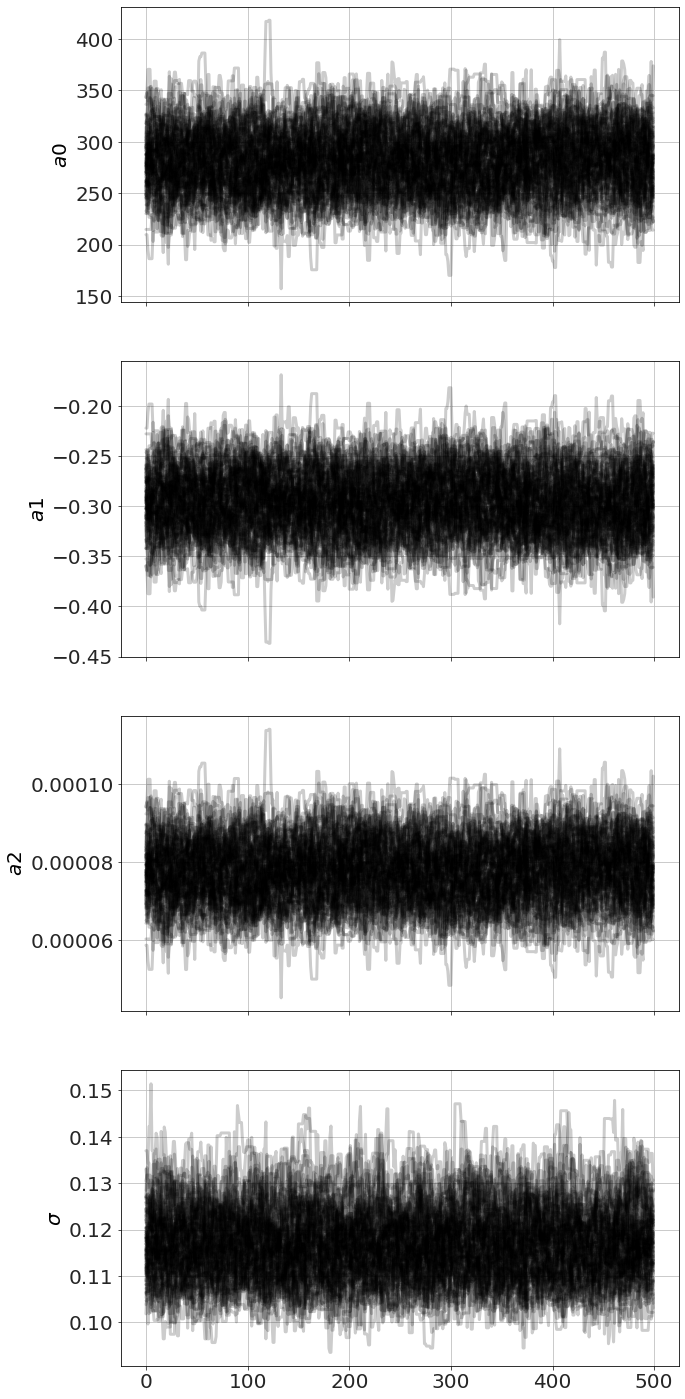

In [34]:
for i in range(2):
    model.run_mcmc(500)
model.plot_chains()

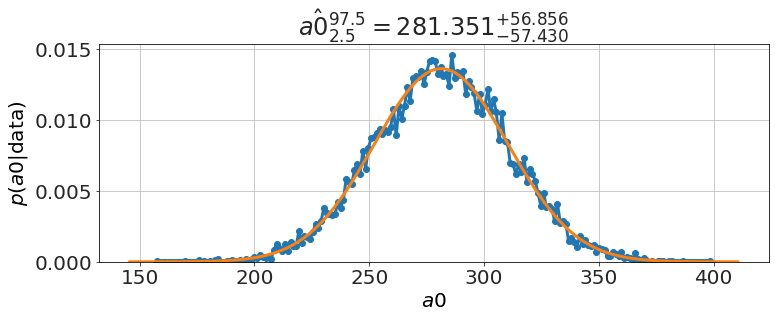

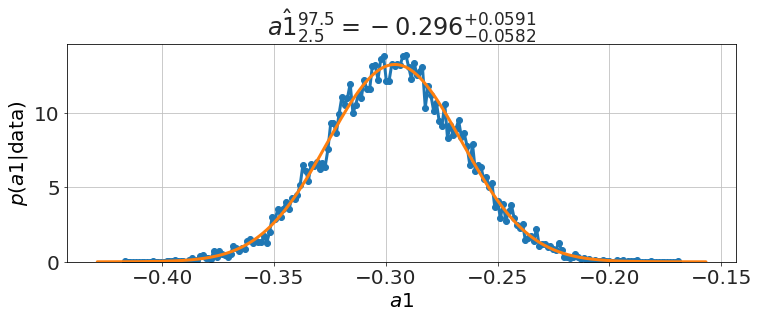

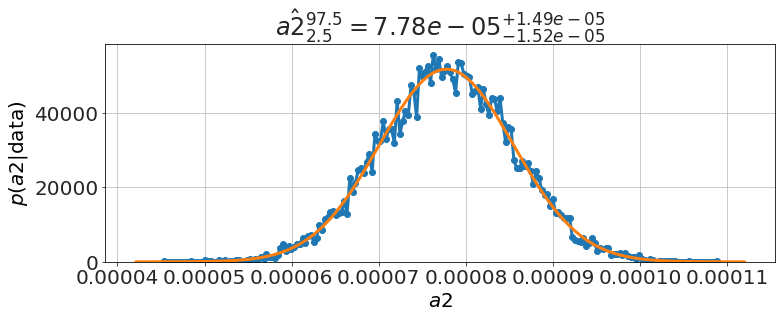

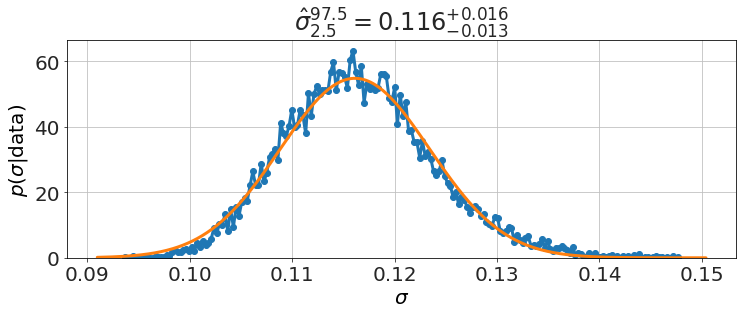

In [35]:
model.plot_distributions()

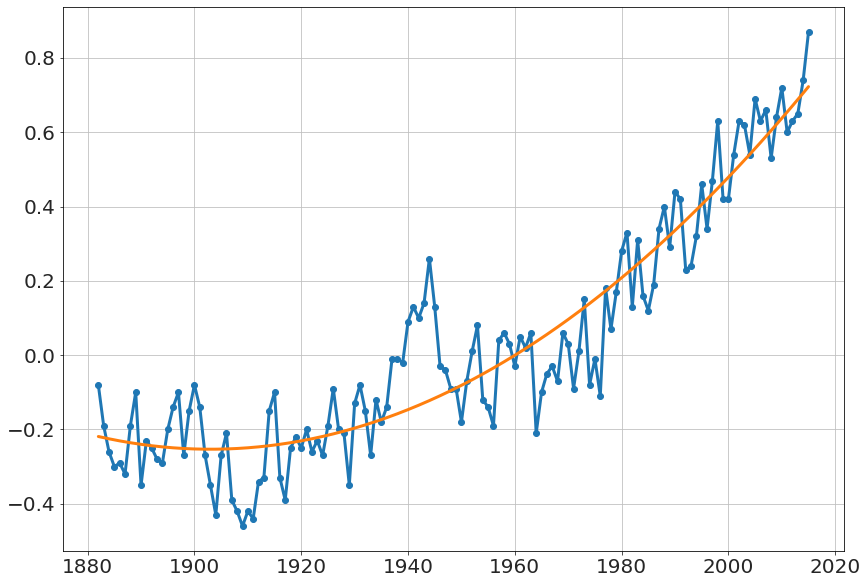

In [36]:
figure(figsize=(14,10))
plot(t,T,'-o')

a0=model.best_estimates()['a0'][1]
a1=model.best_estimates()['a1'][1]
a2=model.best_estimates()['a2'][1]

μ=a0+a1*t+a2*t*t
plot(t,μ,'-')